In [29]:
import json
import re
import nltk
nltk.download('punkt')
from nltk import TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
with open('v2-tweetovi.json') as file:
  data =  json.load(file)

In [31]:
#acess text parameter because we use dictonary
tweet_text = []



1.   Collect 100 tweets without retweets on NBA topic.





In [32]:
for tweet in data:
  tweet_text.append(tweet['text'])

tweet_text

['From my sources, NBA Youngboy is dropping again today to respond to Gucci Mane "Publicity Stunt"',
 '@_scoope_ He responded to NBA YoungBoy',
 'Saturday on ABC/ESPN\n1pm  UFC Live\n2pm  NFL Combine Special\n3pm  NHL Hockey-Chicago at Philadelphia\n8pm  NBA Countd… https://t.co/WAAKp9ho85',
 'NBA YoungBoy - I Hate YoungBoy https://t.co/areb3R2olr via @YouTube',
 '@GetUpESPN it\'s obvious that @ZachLowe_NBA Didn\'t watch the game last night. He was ask a direct question "Why didn… https://t.co/PrfiswgHum',
 'LMFAOOOOOOOOOOOOOO https://t.co/PHAjyHzckd',
 'Are we watching the downfall of nba youngboy rn',
 'HURRY UP AND FREAKING COME BACK PLEASE https://t.co/N4okBS3ZKY',
 'DFS NBA Full Court Press: FanDuel &amp; DraftKings Main Slate – Mar. 4th, 2022 https://t.co/zE06rzzNCG',
 'DFS NBA Picks with Breakdown for Prize Picks – Friday 3/4/22 https://t.co/jXzfoyfSFd',
 '@NBA Ja is all the hype',
 '@localpla8tic @spursawayy NBA Chat trophy is gonna be mine peasant',
 '@thesuboyy_nba I’m surpri



1.   Isolate tweet that has most the hashtags.
2.   Show percentage of how many words are hashtag in tweet.



In [ ]:
#1.

tweet_tokenizer = TweetTokenizer()

hashtags = {} #tweet that has most hashtags

for tweet in tweet_text:

  hashtags[tweet] = len(re.findall(r'#[^ #]+', tweet))   #mecuj tarabu i sve sto nije razmak i taraba

max_value = max(hashtags, key=hashtags.get)   #most hashtags
print(max_value)

  # tweet_tokens = tweet_tokenizer.tokenize(tweet)
  # for token in tweet_tokens:
  #   if token.startswith("#"):
  #     print(token)

tweet_tokens = tweet_tokenizer.tokenize(max_value)
perc = int(hashtags[max_value])/len(tweet_tokens)*100

print(str(round(perc, 1))+"%")

Use VFX in your favorite sport video💯🔥
https://t.co/hhoBP0sv7H
#sports #Lakers #NBA #Messi #Ronaldo #Olympics… https://t.co/PQTFHv2S98
33.3%




1.   Make a pool of NBA accounts https://www.complex.com/sports/all-30-nba-twitter-accounts-ranked-for-2020
2.   Show top 5 most commonly mentioned teams in dataset of tweets.



In [ ]:
#2.

nba_teams_list = ['@DetroitPistons', '@WashWizards', '@Hornets', '@Pacers', '@celtics','@cavs','@ChicagoBulls']

all_text = "".join(tweet_text)

nba_dict = {}

for nba_team in nba_teams_list:

  num = len(re.findall(fr'{nba_team}', all_text))

  #print(nba_team, ":", num)

  nba_dict[nba_team] = num

max_value = max(nba_dict, key=nba_dict.get)

top_5 = sorted(nba_dict, key=nba_dict.get, reverse=True)[:5]

top_5

#one way
# mentions = []
# for tweets in tweet_text:
#   tweet_tokens = tweet_tokenizer.tokenize(tweets)
  
#   for token in tweet_tokens:

#     if token.startswith('@'):
#       mentions.append(token)

# mentions

['@celtics', '@DetroitPistons', '@WashWizards', '@Hornets', '@Pacers']

-Make a function that will remove from tweets:


1.   Hashtags-remove only character #, if hashtag is made of more that 2 words, separate it on two words.
2.   Mentions-if that is nba team, remove just @ sign, everything should be deleted.
3.  URL
4.  Stopwords
5.  Punctuation marks
6.  Emoticons



*   As output, function should return lowercase tokens for each tweet.








In [33]:
#3.
tweet_tokenizer = TweetTokenizer()

def preprocess(tweet):

  tweet_no_url = re.sub(r'https?://[^ ]+', '', tweet)

  tweet_tokens = tweet_tokenizer.tokenize(tweet_no_url)

  no_stop_words = [token for token in tweet_tokens if not token in stopwords.words()]

  no_hashtags_token = []

  for token in no_stop_words:

    if token.startswith('#'):

      if len(re.findall(r'#', token)) > 1:

        token_separated = re.sub(r'#', ' ', token)

      else:

        token_separated = re.sub(r'#', '', token)
      
      no_hashtags_token.append(token_separated)
      
    else:

      no_hashtags_token.append(token)
  
  no_mentions_tokens = []

  for token in no_hashtags_token:

    if token.startswith("@"):

      if token in nba_teams_list:

        no_mentions_tokens.append(token[1:])
    
    else:

      no_mentions_tokens.append(token)
  
  tweet_text = " ".join(no_mentions_tokens)

  tweet_no_spec = re.sub(r'[^A-Za-z ]', '', tweet_text)

  tokens = word_tokenize(tweet_no_spec)

  lower_case_tokens  = [token.lower() for token in tokens]

  return lower_case_tokens

In [34]:
#Runtime error

cleaned_up_tweet_tokens = []

# for tweet in tweet_text:

#   lct = preprocess(tweet)

#   print(lct)

for tweet in tweet_text:

  cleaned_up_tweet_tokens.append(preprocess(tweet))

cleaned_up_tweet_tokens

[['from',
  'sources',
  'nba',
  'youngboy',
  'dropping',
  'today',
  'respond',
  'gucci',
  'mane',
  'publicity',
  'stunt'],
 ['he', 'responded', 'nba', 'youngboy'],
 ['saturday',
  'abc',
  'espn',
  'pm',
  'ufc',
  'live',
  'pm',
  'nfl',
  'combine',
  'special',
  'pm',
  'nhl',
  'hockeychicago',
  'philadelphia',
  'p',
  'nba',
  'countd'],
 ['nba', 'youngboy', 'i', 'hate', 'youngboy'],
 ['obvious',
  'didnt',
  'watch',
  'game',
  'night',
  'he',
  'direct',
  'question',
  'why'],
 ['lmfaoooooooooooooo'],
 ['are', 'watching', 'downfall', 'nba', 'youngboy', 'rn'],
 ['hurry', 'up', 'and', 'freaking', 'come', 'back', 'please'],
 ['dfs',
  'nba',
  'full',
  'court',
  'press',
  'fanduel',
  'draftkings',
  'main',
  'slate',
  'mar',
  'th'],
 ['dfs', 'nba', 'picks', 'breakdown', 'prize', 'picks', 'friday'],
 ['ja', 'hype'],
 ['nba', 'chat', 'trophy', 'gon', 'na', 'peasant'],
 ['i', 'surprised', 'dxy', 'pumping', 'close', 'gap'],
 ['celtics', 'he'],
 ['clears', 'frauk



1.   Show top 5 most commonly used words from cleaned tweets, word that has been initial query for searh should not be in top 5.
2.   Make a dataframe which shows results.
3.   Make graph which shows results.



In [35]:
#4.

import itertools
import collections
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
merged = list(itertools.chain.from_iterable(cleaned_up_tweet_tokens))

element = 'nba'

merged_no_nba = [j for i,j in enumerate(merged) if j!=element]

counter = collections.Counter(merged_no_nba)

counter.most_common()[:5] #first five

[('i', 17), ('celtics', 9), ('the', 8), ('youngboy', 5), ('he', 5)]

In [37]:
#Dataframe

tweets_2 = pd.DataFrame(counter.most_common(5), columns=['words', 'count'])

tweets_2.head()

words  count
0         i     17
1   celtics      9
2       the      8
3  youngboy      5
4        he      5

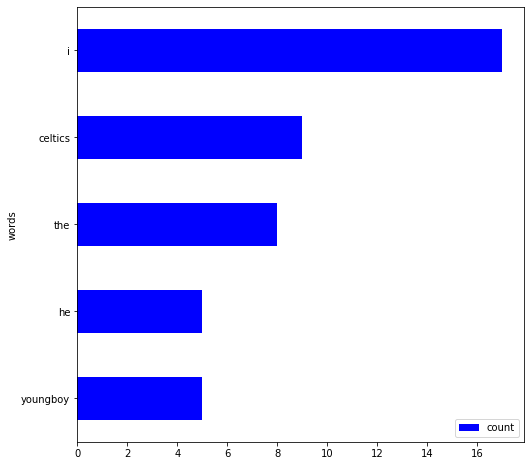

In [38]:
fig, ax = plt.subplots(figsize=(8,8))

tweets_2.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color='blue')

plt.show()